<a href="https://colab.research.google.com/github/justynigam/DS-Task/blob/main/googleplaystore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
%pip install numpy pandas matplotlib seaborn scikit-learn

In [4]:
%pip install tensorflow

In [5]:
%pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

Looking in indexes: https://download.pytorch.org/whl/cu121


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import torch
import torchvision
import torchaudio
import warnings
warnings.filterwarnings('ignore')

Experiential Day 1 Workshop

1. Googleplaystore Exploratory data analysis

In [7]:
data = pd.read_csv('googleplaystore.csv')

In [8]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [9]:
print("Shape of the dataset : ", data.shape)

Shape of the dataset :  (10841, 13)


In [10]:
print("Columns (features and Label) :" , data.columns.tolist())

Columns (features and Label) : ['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [12]:
data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [13]:
data.describe(include='object')

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,596,1695,1579,10039,10040,8714,842,326,1459,2451


In [14]:
data.isnull().sum()

,0
App,0
Category,0
Rating,1474
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


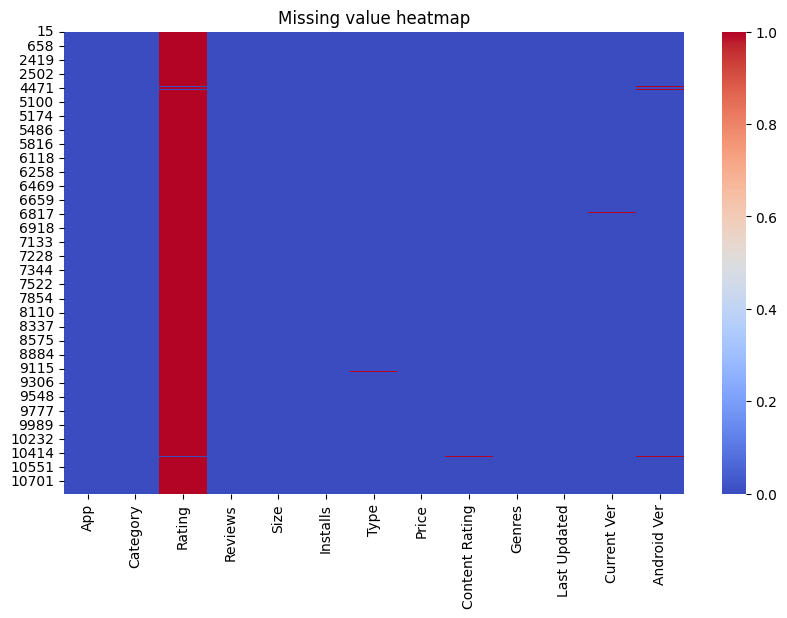

In [15]:
missing_rows = data[data.isnull().any(axis=1)]
plt.figure(figsize=(10,6))
sns.heatmap(missing_rows.isnull(), cbar=True , cmap='coolwarm')
plt.title('Missing value heatmap')
plt.show()

In [16]:

data['Rating'] = data['Rating'].fillna(data['Rating'].median())
data.dropna(subset=['Type', 'Content Rating' , 'Current Ver' , 'Android Ver',], inplace=True)
data.isnull().sum()

,0
App,0
Category,0
Rating,0
Reviews,0
Size,0
Installs,0
Type,0
Price,0
Content Rating,0
Genres,0


1.1 Data Cleaning and Type Conversion

In [17]:
data_copy = data.copy()

In [18]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [19]:
data_copy.dtypes

,0
App,object
Category,object
Rating,float64
Reviews,object
Size,object
Installs,object
Type,object
Price,object
Content Rating,object
Genres,object


In [20]:
data_copy['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [21]:
data_copy['Reviews'] = pd.to_numeric(data_copy['Reviews']).astype(int)
data_copy['Reviews'].dtype

dtype('int64')

In [22]:
data_copy.describe()

,Rating,Reviews
count,10829.000000,1.082900e+04
mean,4.206510,4.446018e+05
std,0.480467,2.929213e+06
min,1.000000,0.000000e+00
25%,4.100000,3.800000e+01
50%,4.300000,2.100000e+03
75%,4.500000,5.481500e+04
max,5.000000,7.815831e+07


In [23]:
data_copy['Size'].dtype

dtype('O')

In [24]:
data_copy['Size'] = data_copy['Size'].str.replace('M' , '000').str.replace('k',' ')
data_copy['Size'] = data_copy['Size'].replace('Varies with device' , np.nan)
data_copy['Size'].unique()

array(['19000', '14000', '8.7000', '25000', '2.8000', '5.6000', '29000',
       '33000', '3.1000', '28000', '12000', '20000', '21000', '37000',
       '5.5000', '17000', '39000', '31000', '4.2000', '7.0000', '23000',
       '6.0000', '6.1000', '4.6000', '9.2000', '5.2000', '11000', '24000',
       nan, '9.4000', '15000', '10000', '1.2000', '26000', '8.0000',
       '7.9000', '56000', '57000', '35000', '54000', '201 ', '3.6000',
       '5.7000', '8.6000', '2.4000', '27000', '2.7000', '2.5000', '16000',
       '3.4000', '8.9000', '3.9000', '2.9000', '38000', '32000', '5.4000',
       '18000', '1.1000', '2.2000', '4.5000', '9.8000', '52000', '9.0000',
       '6.7000', '30000', '2.6000', '7.1000', '3.7000', '22000', '7.4000',
       '6.4000', '3.2000', '8.2000', '9.9000', '4.9000', '9.5000',
       '5.0000', '5.9000', '13000', '73000', '6.8000', '3.5000', '4.0000',
       '2.3000', '7.2000', '2.1000', '42000', '7.3000', '9.1000', '55000',
       '23 ', '6.5000', '1.5000', '7.5000', '51000'

In [25]:
data_copy['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+'], dtype=object)

In [26]:
data_copy['Installs'] = data_copy['Installs'].str.replace('+' , ' ').str.replace(',' , '')
data_copy['Installs'].unique()

array(['10000 ', '500000 ', '5000000 ', '50000000 ', '100000 ', '50000 ',
       '1000000 ', '10000000 ', '5000 ', '100000000 ', '1000000000 ',
       '1000 ', '500000000 ', '50 ', '100 ', '500 ', '10 ', '1 ', '5 ',
       '0 '], dtype=object)

In [27]:
data_copy['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [28]:
chars_to_remove = ['$' , '+']
columns_to_clean = ['Price' , 'Size' , 'Installs']
for col in columns_to_clean:
  for char in chars_to_remove:
    data_copy[col] = data_copy[col].str.replace(char , '')

# Remove spaces from the 'Installs' column
data_copy['Installs'] = data_copy['Installs'].str.replace(' ', '')

data_copy['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [29]:
#TYPE CONVERSION
data_copy['Installs']= data_copy['Installs'].astype(int)
data_copy['Price'] = data_copy['Price'].astype(float)
data_copy['Size'] = data_copy['Size'].astype(float)


In [30]:
data_copy['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [31]:
data_copy['Last Updated'] = pd.to_datetime(data_copy['Last Updated'])
data_copy['Last Updated']

,Last Updated
0,2018-01-07
1,2018-01-15
2,2018-08-01
3,2018-06-08
4,2018-06-20
...,...
10836,2017-07-25
10837,2018-07-06
10838,2017-01-20
10839,2015-01-19


In [32]:
data_copy['Day'] = data_copy['Last Updated'].dt.day
data_copy['Month'] = data_copy['Last Updated'].dt.month
data_copy['Year'] = data_copy['Last Updated'].dt.year
#drop the original column
data_copy.drop('Last Updated' , axis=1 , inplace=True)

Handling Duplicates

In [33]:
data_copy.duplicated().sum()

np.int64(483)

In [34]:
data_copy = data_copy.drop_duplicates(subset=['App'] , keep='first')
data_copy.duplicated('App').sum()

np.int64(0)

Data Visualization


In [35]:
num_features = [col for col in data_copy.columns if data_copy[col].dtype != 'O']
cat_features = [col for col in data_copy.columns if data_copy[col].dtype == 'O']
print(f'{len(num_features)} numerice features -> {num_features}')
print(f'{len(cat_features)} categoric features -> {cat_features}')

8 numerice features -> ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Day', 'Month', 'Year']
7 categoric features -> ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


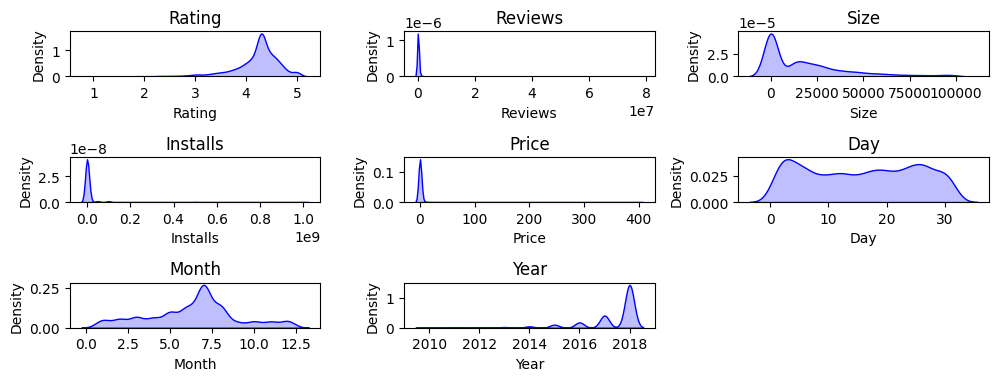

In [36]:
plt.figure(figsize=(10,6))
for i in range(0 , len(num_features)):
  plt.subplot(5,3,i+1)
  sns.kdeplot(data_copy[num_features[i]], color='blue',fill=True)
  plt.title(num_features[i])
  plt.xlabel(num_features[i])
plt.tight_layout()
plt.show()

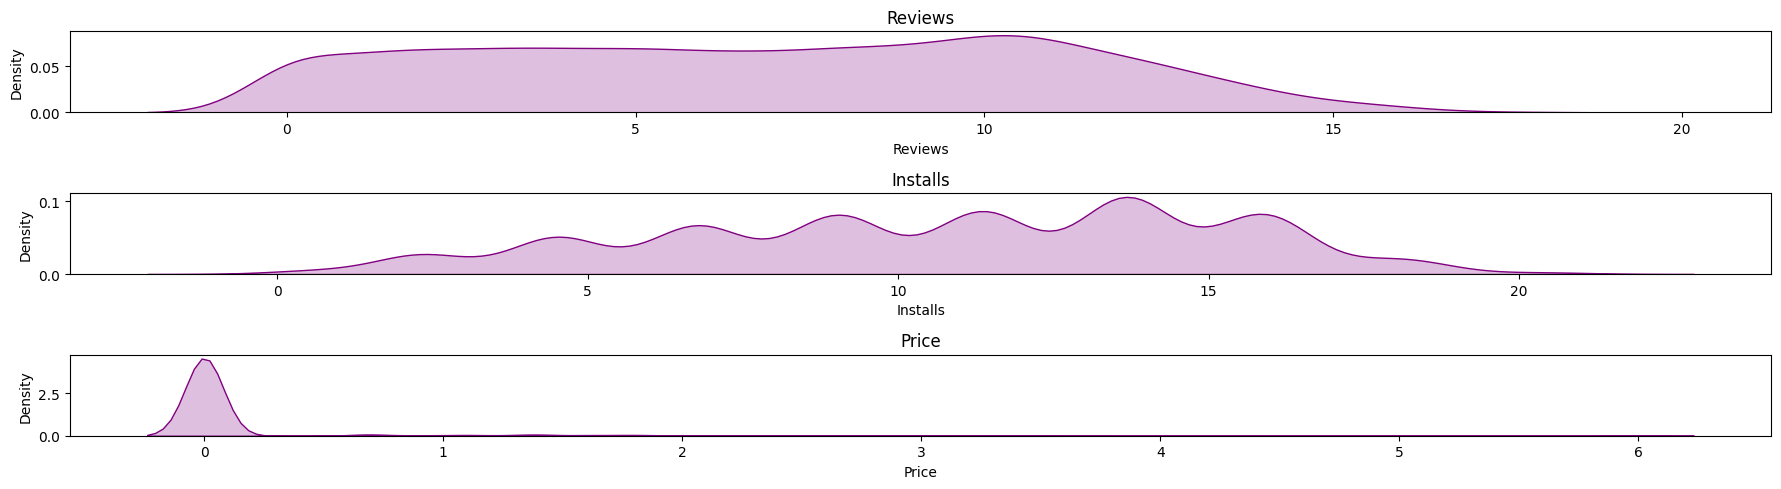

In [37]:
columns = ['Reviews' , 'Installs' , 'Price']
plt.figure(figsize=(18, 5))
for i , col in enumerate(columns):
  plt.subplot(3,1,i+1)
  sns.kdeplot(np.log1p(data_copy[columns[i]]),color='purple',fill=True)
  plt.title(columns[i])
  plt.xlabel(columns[i])
  plt.ylabel('Density')
plt.tight_layout()
plt.show()

Bivarient Analysis

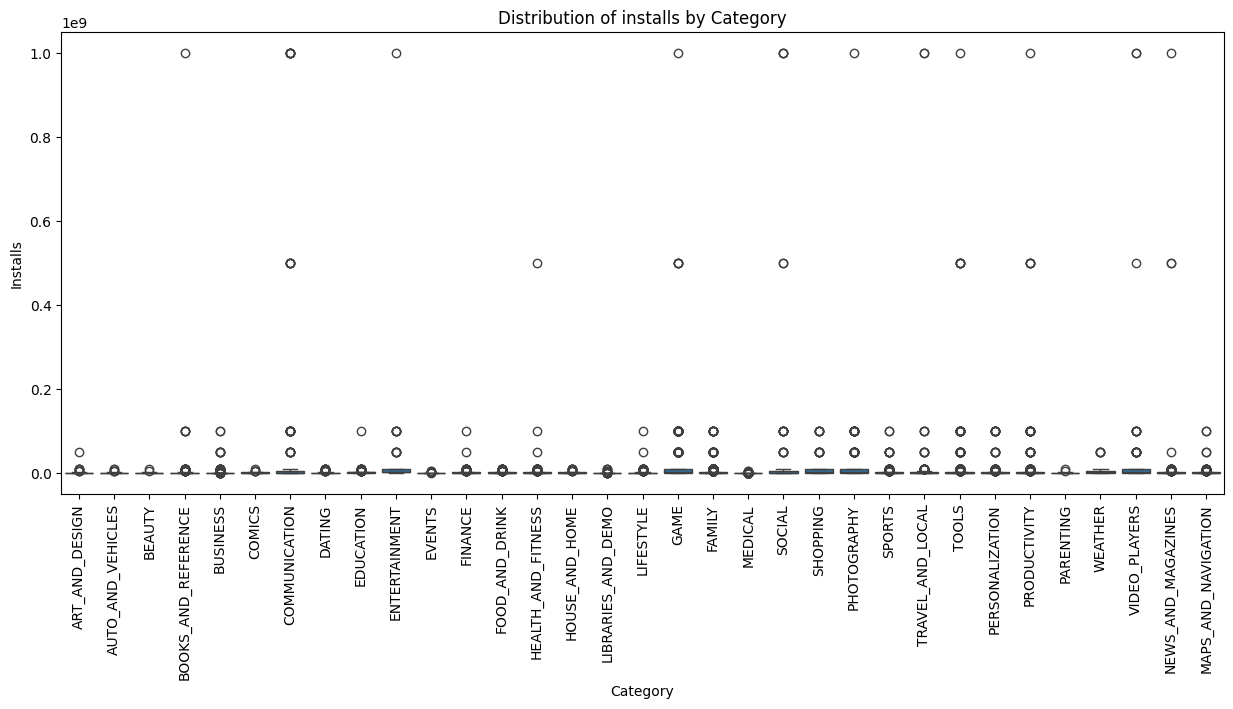

In [38]:
plt.figure(figsize=(15,6))
sns.boxplot(x='Category' , y='Installs' , data=data_copy)
plt.xticks(rotation=90)
plt.title('Distribution of installs by Category')
plt.show()


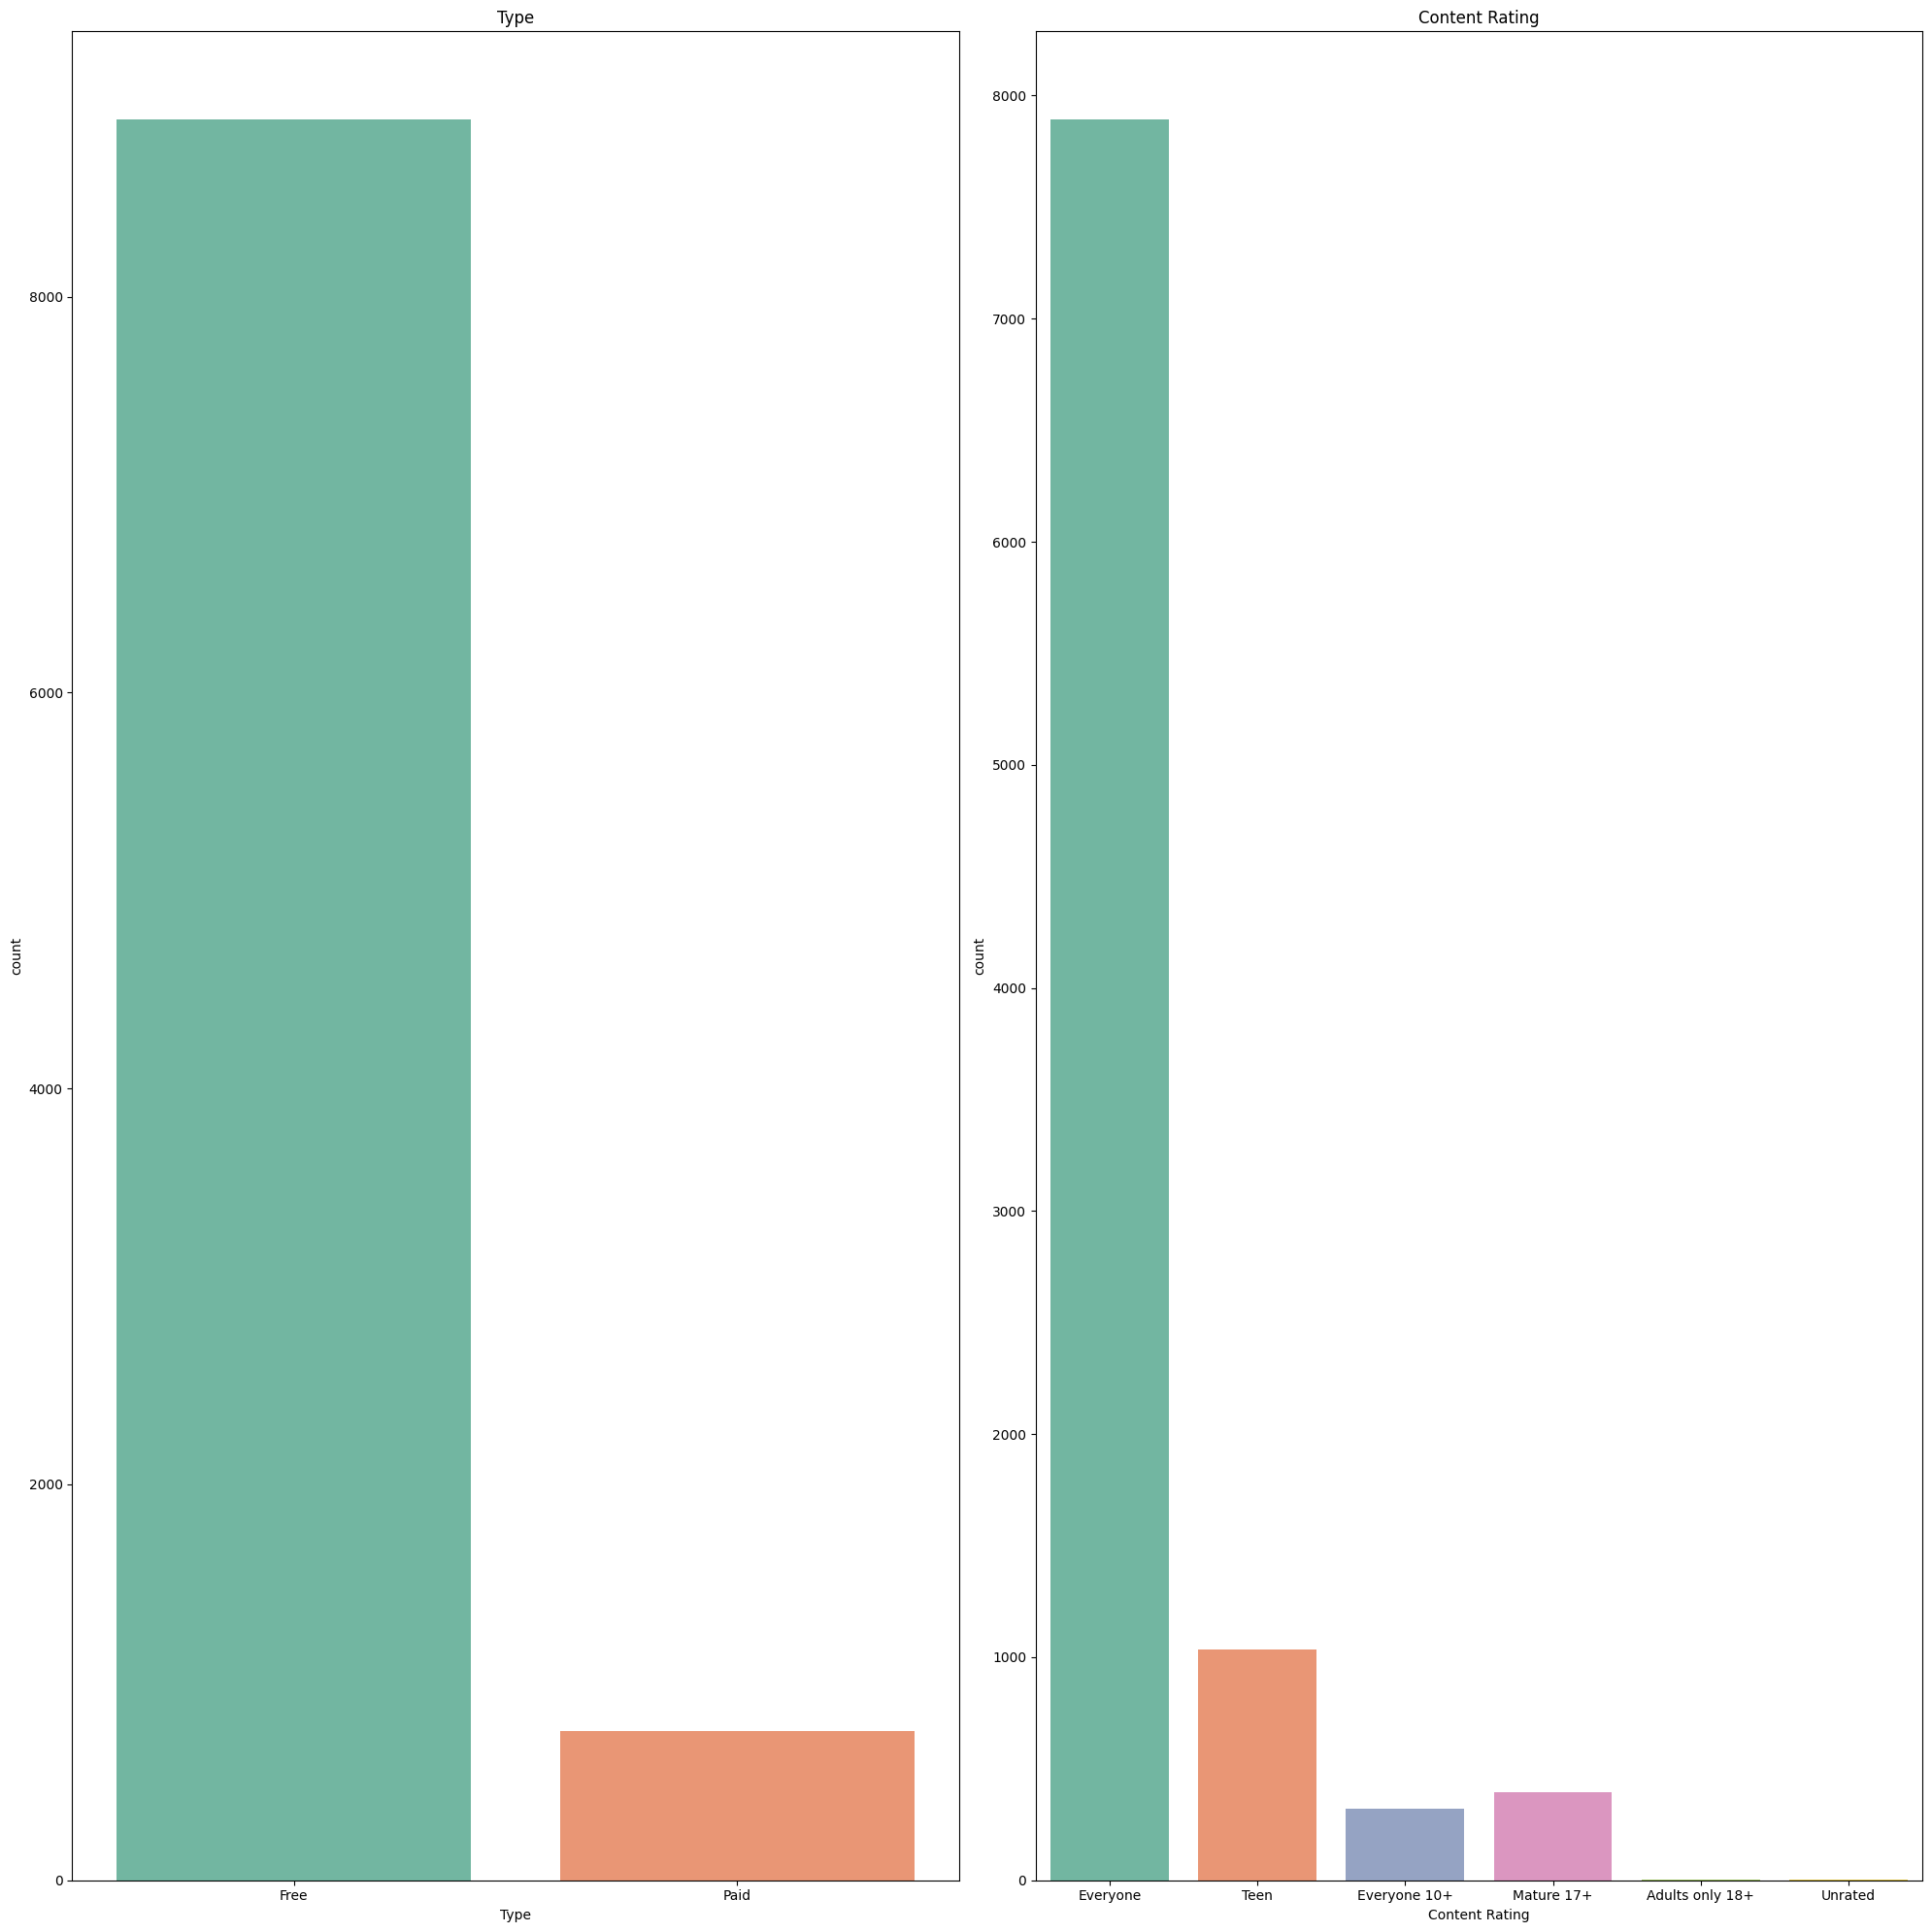

In [40]:
plt.figure(figsize=(20,20))
category=['Type' , 'Content Rating']
for i in range(0 , len(category)):
  plt.subplot(1,2,i+1)
  sns.countplot(x=data_copy[category[i]] , palette='Set2')
  plt.ylabel(category[i])
  plt.ylabel('count')
  plt.title(category[i])
plt.tight_layout()

Multivarient Analysis

In [45]:
data_copy.corr(numeric_only=True)

,Rating,Reviews,Size,Installs,Price,Day,Month,Year
Rating,1.000000,0.050215,0.043973,0.034310,-0.018673,-0.007527,0.008468,0.114056
Reviews,0.050215,1.000000,0.176208,0.625158,-0.007604,-0.033128,0.036504,0.058084
Size,0.043973,0.176208,1.000000,0.133915,-0.022193,-0.014895,0.032059,0.195564
Installs,0.034310,0.625158,0.133915,1.000000,-0.009413,-0.042073,0.043133,0.068853
Price,-0.018673,-0.007604,-0.022193,-0.009413,1.000000,-0.009115,0.007319,-0.003642
Day,-0.007527,-0.033128,-0.014895,-0.042073,-0.009115,1.000000,-0.066145,-0.015665
Month,0.008468,0.036504,0.032059,0.043133,0.007319,-0.066145,1.000000,-0.200629
Year,0.114056,0.058084,0.195564,0.068853,-0.003642,-0.015665,-0.200629,1.000000


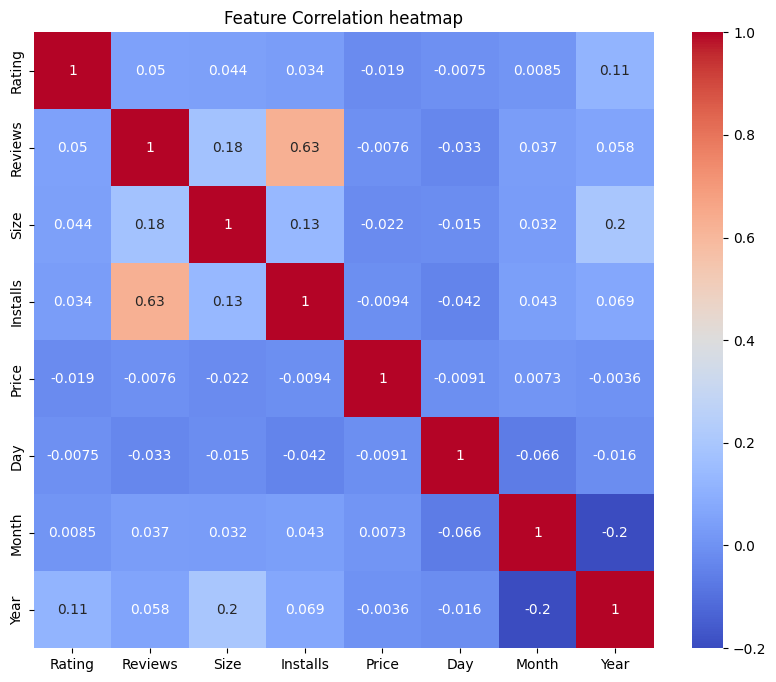

In [44]:
plt.figure(figsize=(10,8))
sns.heatmap(data_copy.corr(numeric_only=True ) , annot=True, cmap= 'coolwarm')
plt.title('Feature Correlation heatmap')
plt.show()

Data Distribution Plots

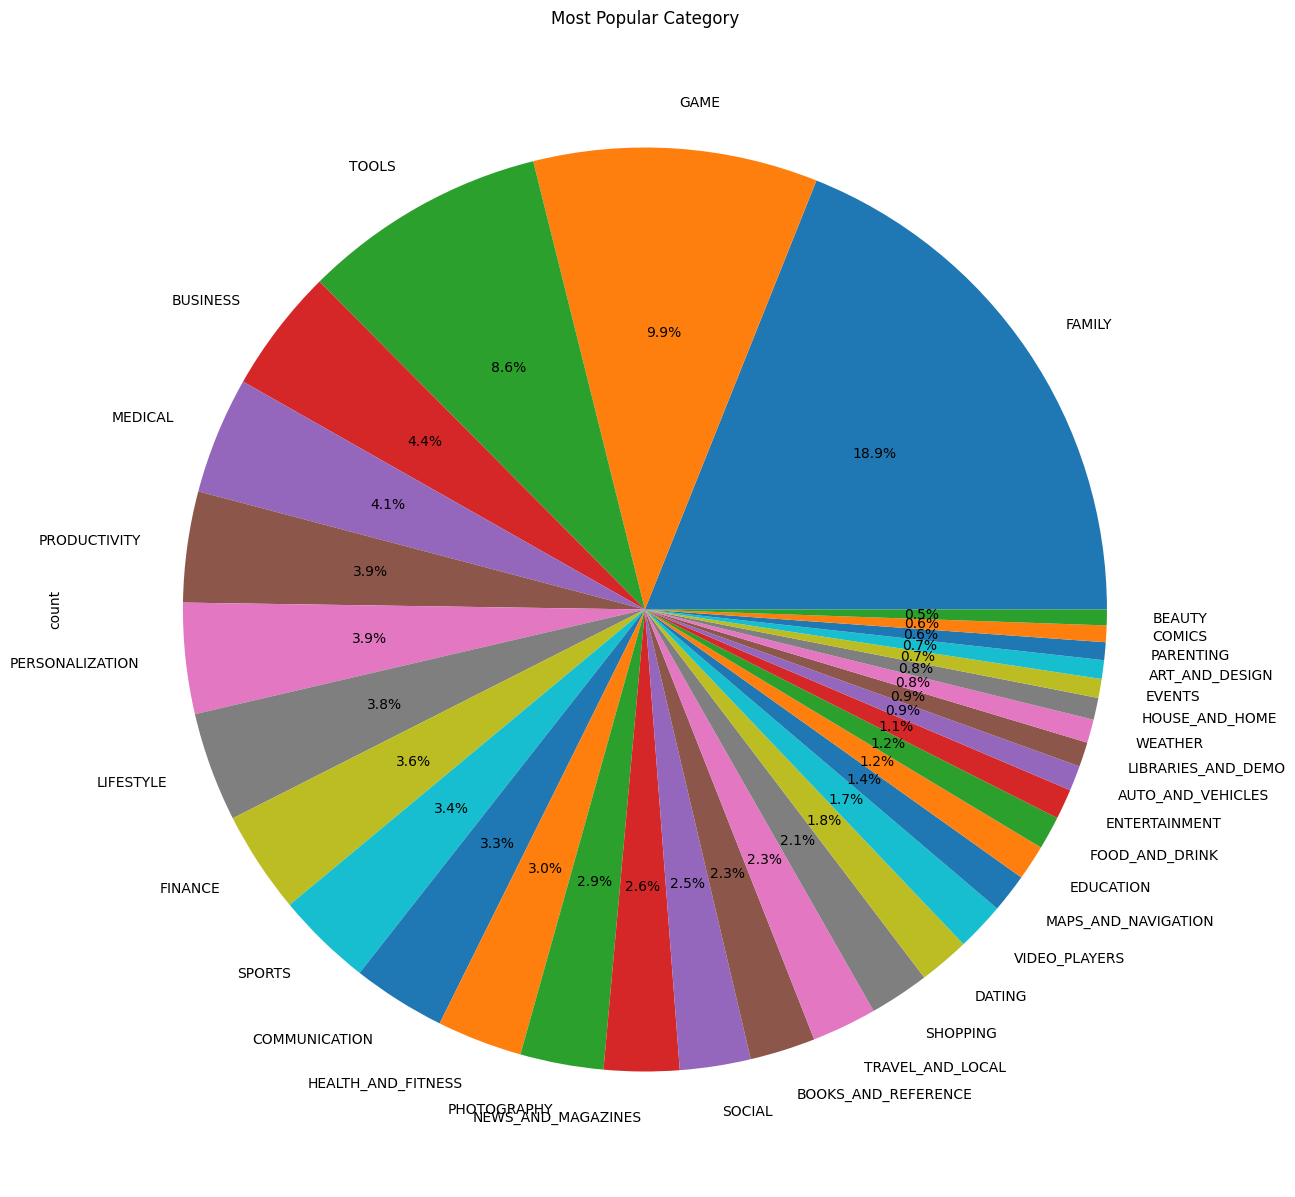

In [46]:
#pie chart
data_copy['Category'].value_counts().plot.pie(figsize=(15,15) , autopct='%1.1f%%')
plt.title('Most Popular Category')
plt.show()

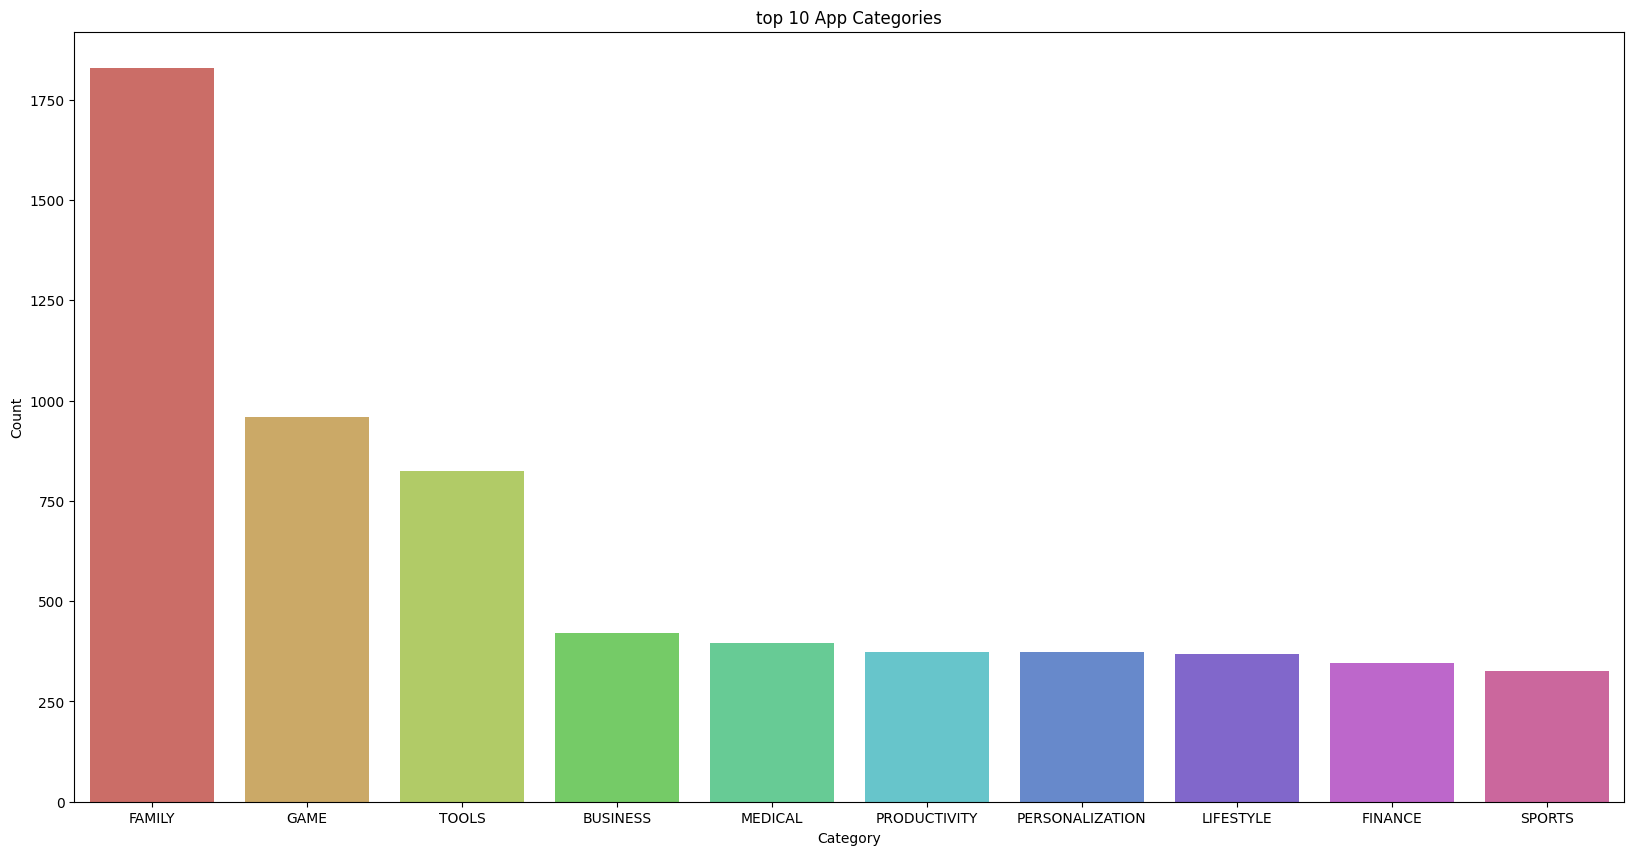

In [48]:
category = pd.DataFrame(data_copy['Category'].value_counts().head(10))
category.reset_index(inplace=True)
category.columns=['Category', 'Count']
plt.figure(figsize=(20,10))
sns.barplot(x='Category' , y='Count' , data=category , palette='hls')
plt.title('top 10 App Categories')
plt.show()

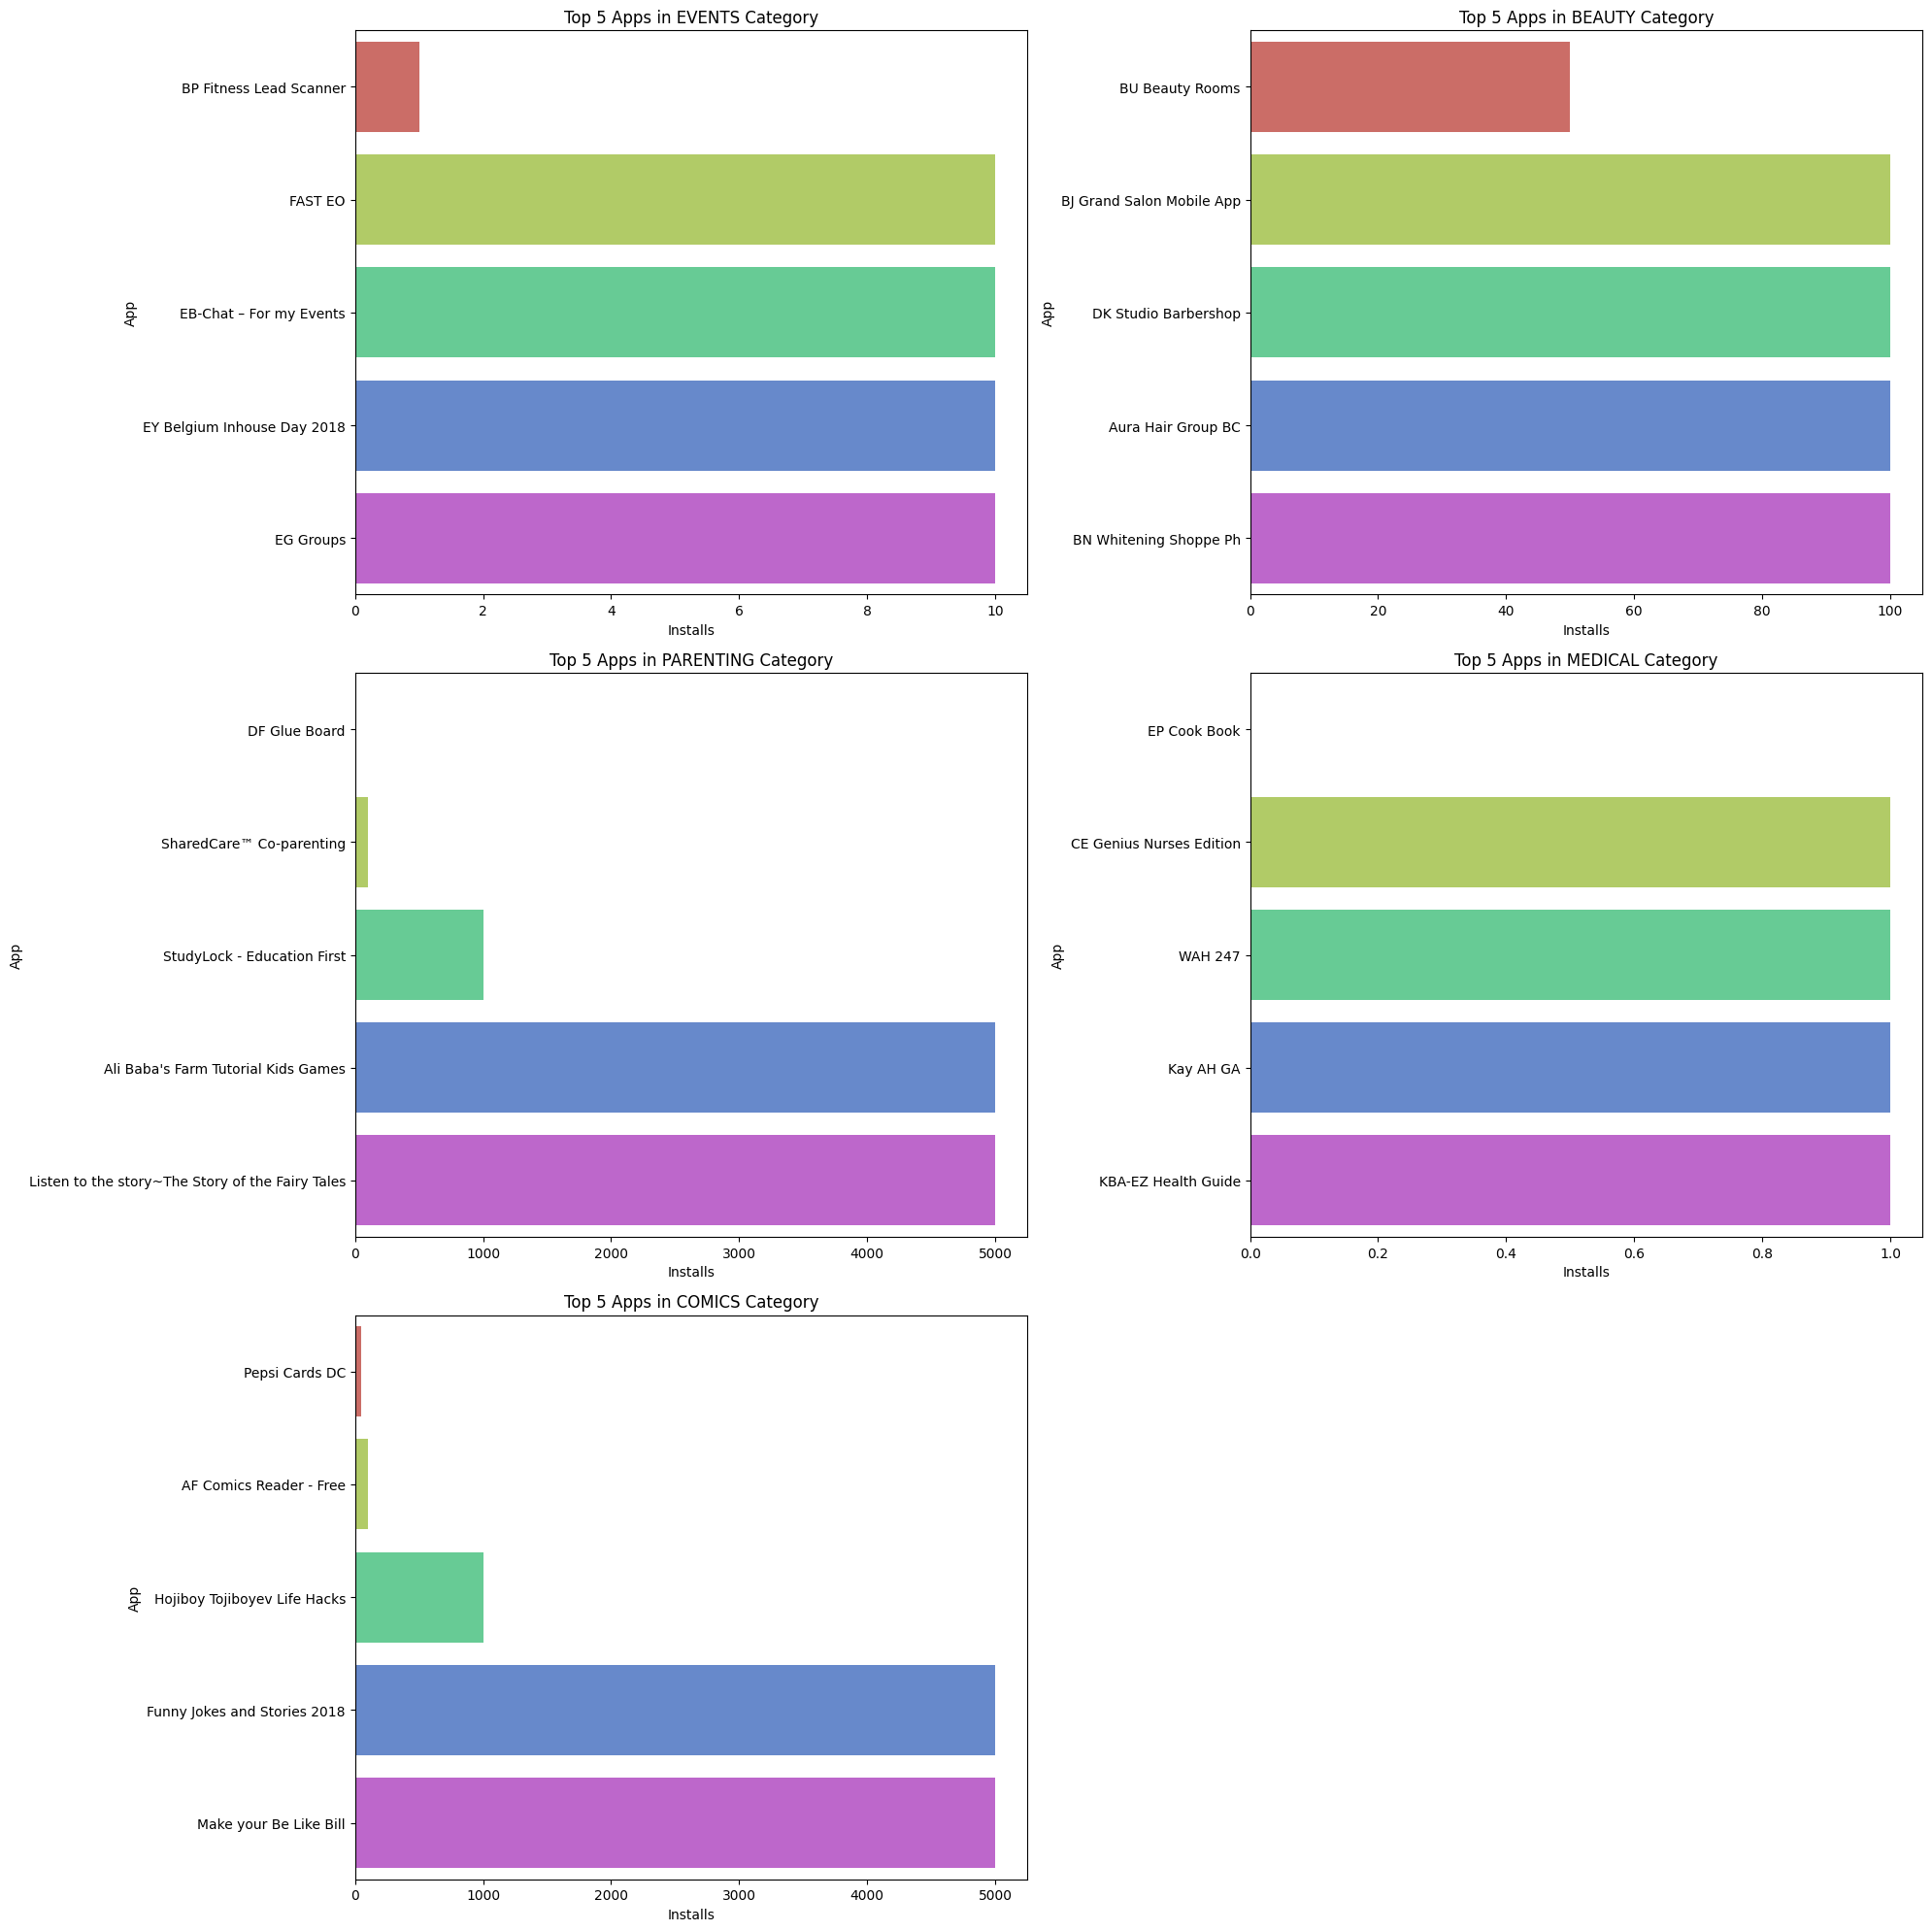

In [52]:
df_top_5_category = data_copy.groupby('Category')['Installs'].sum().sort_values(ascending=True).head(5).index
plt.figure(figsize=(20,20))
for i, category in enumerate(df_top_5_category):
  df_top_5=data_copy[data_copy['Category']==category].sort_values(by='Installs',ascending=True).head(5)
  plt.subplot(3,2,i+1)
  sns.barplot(x='Installs',y='App',data=df_top_5,palette='hls')
  plt.title(f'Top 5 Apps in {category} Category')
  plt.tight_layout()